# ASR Assignment 2019-20

This notebook has been provided as a template to get you started on the assignment.  Feel free to use it for your development, or do your development directly in Python.

You can find a full description of the assignment [here](http://www.inf.ed.ac.uk/teaching/courses/asr/2019-20/coursework.pdf).

You are provided with two Python modules `observation_model.py` and `wer.py`.  The first was described in [Lab 3](https://github.com/Ore-an/asr_lab3/blob/master/asr_lab3.ipynb).  The second can be used to compute the number of substitution, deletion and insertion errors between ASR output and a reference text.

It can be used as follows:

```python
import wer

my_refence = 'A B C'
my_output = 'A C C D'

wer.compute_alignment_errors(my_reference, my_output)
```

This produces a tuple $(s,d,i)$ giving counts of substitution,
deletion and insertion errors respectively - in this example (1, 0, 1).  The function accepts either two strings, as in the example above, or two lists.  Matching is case sensitive.

## Template code

Assuming that you have already made a function to generate an WFST, `create_wfst()` and a decoder class, `MyViterbiDecoder`, you can perform recognition on all the audio files as follows:


In [41]:
import glob
import os
import wer
import observation_model
import openfst_python as fst
import time
from experiment import *
from tqdm import tqdm_notebook as tqdm
import pdb
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import pickle
import cProfile

%reload_ext autoreload
%autoreload 2

def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

## Task 1 - Initial systems

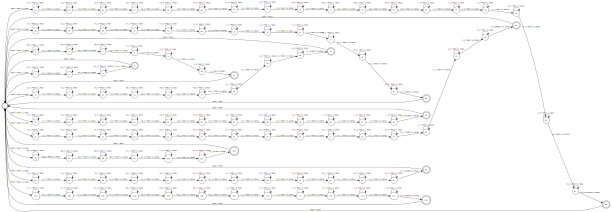

In [46]:
f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output()
f

In [47]:
time_cost,computation_counter,num_states,num_arcs,tot_errors,tot_words = run_exp(f,num_test = 180)

/group/teaching/asr/labs/recordings/0000.wav
recognized words:  where's peter piper picked picked the
correct words:  where's peter piper
/group/teaching/asr/labs/recordings/0001.wav
recognized words:  pickled pickled where's piper picked pickled picked a peter peter of picked the
correct words:  peck peppers piper pickled picked a
/group/teaching/asr/labs/recordings/0002.wav
recognized words:  peter of piper picked the the of a a picked the
correct words:  peter piper picked a peck
/group/teaching/asr/labs/recordings/0003.wav
recognized words:  peter of the piper of picked the
correct words:  peter picked piper
/group/teaching/asr/labs/recordings/0004.wav
recognized words:  pickled of picked the where's the of the a of where's of piper picked the of peck of the where's piper of pickled peppers the of of piper pickled picked of peck picked picked picked the the
correct words:  picked a peck peter piper picked a peck peter piper pickled peppers peter piper picked a peck
/group/teaching/

recognized words:  picked the pickled picked where's the of peck of the pickled pickled peter of of where's picked picked piper of of a the peck picked pickled of of of picked piper of picked the the the
correct words:  where's the peck peter of pickled peter peppers picked piper picked a peck of pickled peppers piper
/group/teaching/asr/labs/recordings/0032.wav
recognized words:  the the the pickled piper of peck picked the of the a pickled pickled the of peppers picked picked where's the a picked picked picked pickled pickled the of where's picked of piper of picked picked the the pickled the the the where's picked the piper
correct words:  peter piper picked a peck of pickled peppers where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0033.wav
recognized words:  piper picked picked picked picked
correct words:  piper picked
/group/teaching/asr/labs/recordings/0034.wav
recognized words:  picked the where's of the peck peck of picked pickled pick

recognized words:  pickled peck where's picked the
correct words:  peck of pickled peppers
/group/teaching/asr/labs/recordings/0060.wav
recognized words:  picked peck of the the
correct words:  a peck of
/group/teaching/asr/labs/recordings/0061.wav
recognized words:  the picked peter piper a picked picked
correct words:  peppers peter piper
/group/teaching/asr/labs/recordings/0062.wav
recognized words:  peppers of peter picked picked the
correct words:  peppers of peter
/group/teaching/asr/labs/recordings/0063.wav
recognized words:  where's the of picked of picked picked the
correct words:  a peck peck
/group/teaching/asr/labs/recordings/0064.wav
recognized words:  peck picked peter of pickled picked picked peck picked piper peter picked pickled picked the picked piper of piper of piper peppers picked where's of picked the
correct words:  peck peter pickled picked picked piper peter pickled piper a the of peck peppers peppers of
/group/teaching/asr/labs/recordings/0065.wav
recognized w

recognized words:  peppers pickled of peck the of picked piper peter picked picked the where's the the
correct words:  peppers pickled of peck a picked piper peter
/group/teaching/asr/labs/recordings/0096.wav
recognized words:  picked the the pickled picked the the a the piper of the of of picked of pickled where's the where's the where's of pickled picked where's peter of piper of picked picked the the picked the picked the the
correct words:  peter piper picked a peck of pickled peppers where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0097.wav
recognized words:  piper pickled peter of piper piper peter
correct words:  peck peck peter piper piper peter
/group/teaching/asr/labs/recordings/0098.wav
recognized words:  picked the the the pickled picked peck of picked peck of picked peck picked pickled peck the a pickled picked the picked of picked piper the of peppers picked picked peck the picked picked pickled piper the of picked pickled peck of

recognized words:  picked the peck where's peter picked the
correct words:  peck where's peter picked
/group/teaching/asr/labs/recordings/0132.wav
recognized words:  where's picked picked of piper picked the
correct words:  where's peter piper
/group/teaching/asr/labs/recordings/0133.wav
recognized words:  picked the the picked the the picked the piper the of peter of a pickled of of picked pickled peter picked picked picked peter of pickled pickled of picked the a picked picked a the of a pickled piper of where's picked the picked the picked picked
correct words:  piper picked peck of peppers pickled peter picked peter pickled peppers the a peck of piper where's
/group/teaching/asr/labs/recordings/0134.wav
recognized words:  peter picked peppers peck the
correct words:  peter picked peppers
/group/teaching/asr/labs/recordings/0135.wav
recognized words:  picked the picked where's of a where's of peck of the of piper where's of piper peck the the
correct words:  where's the peck where's

recognized words:  picked picked the pickled peck picked the pickled peck picked pickled pickled the picked picked peter picked where's peck where's peck of where's picked peck of pickled picked picked the picked peck where's the picked peck peck picked picked picked picked peck where's picked pickled where's peck peck picked picked the picked peck pickled the a pickled picked the of where's picked picked pickled picked peck of peck picked picked picked a a a a where's peck where's where's peck where's peck where's peck of picked picked picked picked picked pickled peck the picked of picked where's peck the of peck of picked the peck the picked pickled pickled where's pickled picked pickled picked picked the picked peck picked the
correct words:  peck the where's a a peck picked piper picked of of piper peter peter peppers a picked of the the the piper where's where's the picked a a picked a of peck where's piper peck peppers a of of peppers picked peter where's a of picked picked pick

In [48]:
print(time_cost,computation_counter,num_states,num_arcs,tot_errors,tot_words)

868.9964079856873 20743775 116 230 2198 2177


## Task2 - System tuning

#### varying the self-loop probabilities

In [ ]:
# array of different self loop probabilities
self_prob = []
results_sp = defaultdict(list)
for sp in self_prob:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(self_loop_prob = sp)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_sp[sp] = [time_cost,computation_counter,num_state,num_arc,tot_error]

In [ ]:
save_obj(results_sp,"task1_sp_result")

####  final probabilities

In [ ]:
# array of different final probabilities
final_prob = []
results_fp = defaultdict(list)
for fp in self_prob:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(self_loop_prob = fp)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_fp[fp] = [time_cost,computation_counter,num_state,num_arc,tot_error]

In [ ]:
save_obj(results_fp,"task1_fp_result")

#### using transitions to each word based on unigram word probabilities (see advanced task)

#### add sil to lexicon

In [ ]:
# compare lexicon with silence and without
f = MyWFST(lexicon='lexicon_sil.txt').create_wfst_word_output()
results_lex_sil = defaultdict(list)

time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
results_lex_sil['lexicon_sil'] = [time_cost,computation_counter,num_state,num_arc,tot_error]

In [ ]:
save_obj(results_lex_sil,"task1_sil_result")

## Task3 - Pruning

In [17]:
# compare a range fo different pruning thresholds
thresholds = np.linspace(0.1,0.99,num=5)
results_prun = defaultdict(list)

for thresh in thresholds:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output()
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180,
                                                                                 beam_width=-math.log(thresh))
    results_prun[thresh] = [time_cost,computation_counter,num_state,num_arc,tot_error]

done


/group/teaching/asr/labs/recordings/0000.wav
recognized words:  where's peter piper picked the the the
correct words:  where's peter piper
/group/teaching/asr/labs/recordings/0001.wav
No path got to the end of the observations.
recognized words:  pickled pickled where's piper picked where's
correct words:  peck peppers piper pickled picked a
/group/teaching/asr/labs/recordings/0002.wav
recognized words:  peck the of where's of peter of a a picked picked a
correct words:  peter piper picked a peck
/group/teaching/asr/labs/recordings/0003.wav
recognized words:  peter of the piper picked picked the
correct words:  peter picked piper
/group/teaching/asr/labs/recordings/0004.wav
No path got to the end of the observations.
recognized words:  peck where's picked the the the of the a of where's of a of of a the of of the where's piper of the where's the of where's peter of of where's peter peck picked picked where's
correct words:  picked a peck peter piper picked a peck peter piper pickled pe

recognized words:  picked the the picked picked where's the of peck of the the of of peck of peter of of of peter picked piper of of a the peck of picked pickled of of of picked piper of picked the the a
correct words:  where's the peck peter of pickled peter peppers picked piper picked a peck of pickled peppers piper
/group/teaching/asr/labs/recordings/0032.wav
recognized words:  the picked the the of peck where's the of of picked the of the a where's picked picked the of the of picked picked picked where's the a picked picked picked picked where's a peck of pickled of the picked of a the of peck picked the picked the picked the picked where's picked the picked the picked peck the a a
correct words:  peter piper picked a peck of pickled peppers where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0033.wav
No path got to the end of the observations.
recognized words:  
correct words:  piper picked
/group/teaching/asr/labs/recordings/0034.wav
recogn

recognized words:  the peck the picked a of picked picked the the a
correct words:  the peck of pickled
/group/teaching/asr/labs/recordings/0058.wav
recognized words:  peck of picked of peck picked peter piper picked picked peck
correct words:  peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0059.wav
recognized words:  picked a the picked the peck of the peter the
correct words:  peck of pickled peppers
/group/teaching/asr/labs/recordings/0060.wav
recognized words:  picked peck of picked the a a
correct words:  a peck of
/group/teaching/asr/labs/recordings/0061.wav
recognized words:  peter picked peck a peppers picked the a
correct words:  peppers peter piper
/group/teaching/asr/labs/recordings/0062.wav
recognized words:  picked of a a a of peter picked the the
correct words:  peppers of peter
/group/teaching/asr/labs/recordings/0063.wav
recognized words:  of where's picked the of the a picked the a picked the
correct words:  a peck peck
/group/teaching/a

recognized words:  peppers pickled of peck the peck the piper peck the picked picked the where's the peck
correct words:  peppers pickled of peck a picked piper peter
/group/teaching/asr/labs/recordings/0096.wav
recognized words:  picked the the of of picked the the a the where's of of the the the of picked of pickled of of peck of of the where's the of of pickled peck where's peter of of of a peter picked the the picked the picked the the
correct words:  peter piper picked a peck of pickled peppers where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0097.wav
recognized words:  peck of peck the the of of where's piper peter
correct words:  peck peck peter piper piper peter
/group/teaching/asr/labs/recordings/0098.wav
recognized words:  picked the the picked the picked the of pickled peck of peck peck of peck where's peck the of a a the of picked picked the of of peck peter of of of peck of peter picked picked peck the of peck peter a picked piper 

recognized words:  picked the peck where's peter peck picked picked a
correct words:  peck where's peter picked
/group/teaching/asr/labs/recordings/0132.wav
recognized words:  where's peck of peck picked picked the
correct words:  where's peter piper
/group/teaching/asr/labs/recordings/0133.wav
recognized words:  picked the the picked the the picked the where's of the of peter of a peck of picked of of of peck peck of peter peter picked peck picked peter of peck of picked of of the a picked the a a a of a pickled piper where's picked the picked picked the picked the a
correct words:  piper picked peck of peppers pickled peter picked peter pickled peppers the a peck of piper where's
/group/teaching/asr/labs/recordings/0134.wav
recognized words:  peck of peck the peppers the picked
correct words:  peter picked peppers
/group/teaching/asr/labs/recordings/0135.wav
recognized words:  picked the picked the where's piper where's of of of the of of where's piper picked the a a
correct words:  

recognized words:  of where's the picked a a picked picked piper the of peck a picked peck a a peck peck of of peck picked picked
correct words:  a a the peck peter peck of a peck
/group/teaching/asr/labs/recordings/0164.wav
recognized words:  picked picked the picked peck picked the the pickled peck where's picked of peter a picked picked pickled picked peck of picked where's peck where's peck of where's peter of a the of picked the a picked peter a picked the a peck where's the of peck peck of peter picked picked peck the a picked pickled where's peck peck of peter picked the picked peck pickled the a picked peter of of the picked picked pickled pickled peck of peck picked picked a a a a where's peck where's where's peck of of peppers where's peck of picked picked picked picked picked peter of peck of peter where's peck the of peck of picked the peck the a peck of peter of where's of picked peter of the peck picked picked the peter peck picked the a
correct words:  peck the where's a

/group/teaching/asr/labs/recordings/0000.wav
recognized words:  where's peck the peck peck picked picked picked
correct words:  where's peter piper
/group/teaching/asr/labs/recordings/0001.wav
recognized words:  peck of a a a peck of of where's peck of of of peck where's the the peck a picked of peter peck
correct words:  peck peppers piper pickled picked a
/group/teaching/asr/labs/recordings/0002.wav
recognized words:  peck the of of of the the of a a picked picked a
correct words:  peter piper picked a peck
/group/teaching/asr/labs/recordings/0003.wav
No path got to the end of the observations.
recognized words:  
correct words:  peter picked piper
/group/teaching/asr/labs/recordings/0004.wav
No path got to the end of the observations.
recognized words:  peck where's picked the the of the a of where's of a of of a the of of the the of a a the of the where's the of where's
correct words:  picked a peck peter piper picked a peck peter piper pickled peppers peter piper picked a peck
/gr

recognized words:  picked the the of picked where's the peck the the the of of peck of peck the of of of peck picked piper of a the peck of peck a peck of of of of picked peck a of of picked picked the picked picked the picked picked of a a
correct words:  where's the peck peter of pickled peter peppers picked piper picked a peck of pickled peppers piper
/group/teaching/asr/labs/recordings/0032.wav
recognized words:  the of the the the of where's the of of peck the of the a a where's picked peck of the of the of peck the the the picked picked where's the a peck picked picked picked where's a picked peck of of the picked of a the of a picked picked the the the the where's picked the picked the peck picked the a a a a
correct words:  peter piper picked a peck of pickled peppers where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0033.wav
recognized words:  peck the picked picked peck a
correct words:  piper picked
/group/teaching/asr/labs/recordings

No path got to the end of the observations.
recognized words:  
correct words:  the peck of pickled
/group/teaching/asr/labs/recordings/0058.wav
recognized words:  peck of peck of peck peck the a peck of peck peck peck peck peck a
correct words:  peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0059.wav
recognized words:  peck a the the the a the peck a peck of the the the picked peck a
correct words:  peck of pickled peppers
/group/teaching/asr/labs/recordings/0060.wav
No path got to the end of the observations.
recognized words:  
correct words:  a peck of
/group/teaching/asr/labs/recordings/0061.wav
recognized words:  peck a peck peck the peck peck a picked picked a
correct words:  peppers peter piper
/group/teaching/asr/labs/recordings/0062.wav
recognized words:  a of of a a a of peck the the peck peck the
correct words:  peppers of peter
/group/teaching/asr/labs/recordings/0063.wav
No path got to the end of the observations.
recognized words:  a of of

recognized words:  peck peck peck peck peck of peck of peck of the peck peck the the picked peck a
correct words:  peter piper picked a peck of pickled peppers
/group/teaching/asr/labs/recordings/0094.wav
recognized words:  picked picked picked peck of peck peck of peter of the where's picked where's peck of peter the peck peck peck peck of the picked peck of of peck where's of of peck of of of peck peck of peter a the peck peck peck peck peck of peck of picked picked picked where's of the of peck of of pickled picked of peck of picked picked picked where's the peck of of a of peck where's the peck of a a of the of picked picked where's the of peck of peck where's of peck peter of where's of the a a where's peck the of picked picked peck the peck of peck peck picked picked of of the of peck the of peck the a a peck of of peter of picked the
correct words:  the picked picked peck picked peppers peter peter where's pickled the where's pickled peter of peppers where's peter of of peppers 

recognized words:  picked picked picked picked where's the peck of the peck of peck of of of picked the of of a of a picked picked a
correct words:  where's the pickled peppers peter piper pickled a peck of
/group/teaching/asr/labs/recordings/0122.wav
No path got to the end of the observations.
recognized words:  
correct words:  peter picked peppers pickled peppers
/group/teaching/asr/labs/recordings/0123.wav
No path got to the end of the observations.
recognized words:  
correct words:  the piper picked peppers
/group/teaching/asr/labs/recordings/0124.wav
recognized words:  picked of a the of of of peck of of peck the picked picked picked a
correct words:  a peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0125.wav
recognized words:  where's the peck of peck of the peck of peck peck peck picked picked a
correct words:  where's the peter piper the pickled peppers picked
/group/teaching/asr/labs/recordings/0126.wav
recognized words:  picked the where's the

No path got to the end of the observations.
recognized words:  
correct words:  peter pickled a peck of pickled peppers
/group/teaching/asr/labs/recordings/0156.wav
No path got to the end of the observations.
recognized words:  where's
correct words:  where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0157.wav
recognized words:  where's of the the of picked of picked the a the a a a peck peck a peck a the of picked of of peck a a peter picked the where's picked picked of a of a a a a a
correct words:  a a the peck peter peck of of a peck
/group/teaching/asr/labs/recordings/0158.wav
No path got to the end of the observations.
recognized words:  peck picked picked of of of of a the where's of of a a a picked peck of of a peppers the a peck peck where's piper of a peck of a the where's
correct words:  piper picked piper picked peter picked piper picked peck peter piper picked peck peter piper picked
/group/teaching/asr/labs/recordings/0159.wav
recog

/group/teaching/asr/labs/recordings/0000.wav
No path got to the end of the observations.
recognized words:  where's
correct words:  where's peter piper
/group/teaching/asr/labs/recordings/0001.wav
recognized words:  peck a a the of of of the peck of of of peck a a where's the the a a a of a picked a of picked a a
correct words:  peck peppers piper pickled picked a
/group/teaching/asr/labs/recordings/0002.wav
recognized words:  peck the of of of the the of a a peck peck picked
correct words:  peter piper picked a peck
/group/teaching/asr/labs/recordings/0003.wav
recognized words:  peck the of the piper peck of picked a
correct words:  peter picked piper
/group/teaching/asr/labs/recordings/0004.wav
No path got to the end of the observations.
recognized words:  peck where's picked the of the of the a of where's where's the of of the the of a a the of the where's the of where's peck of of where's
correct words:  picked a peck peter piper picked a peck peter piper pickled peppers peter pipe

recognized words:  peck peck the the picked peter where's the peck peck the the of of peck of peck the of of of peck picked the peck of of of a the peck peck the picked of a a a of of picked peck a a of of where's picked the the picked picked the a a picked picked peck a a
correct words:  where's the peck peter of pickled peter peppers picked piper picked a peck of pickled peppers piper
/group/teaching/asr/labs/recordings/0032.wav
recognized words:  the of the the of of where's the of of peck the of the a a where's picked the of of peck the the the picked picked picked where's the a the picked picked picked a where's a peck of peck of of the peck of a the of a a picked peck peck picked the a the the picked picked where's picked the picked the picked picked the peck a
correct words:  peter piper picked a peck of pickled peppers where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0033.wav
No path got to the end of the observations.
recognized words:

No path got to the end of the observations.
recognized words:  
correct words:  peck of pickled peppers
/group/teaching/asr/labs/recordings/0060.wav
No path got to the end of the observations.
recognized words:  
correct words:  a peck of
/group/teaching/asr/labs/recordings/0061.wav
No path got to the end of the observations.
recognized words:  
correct words:  peppers peter piper
/group/teaching/asr/labs/recordings/0062.wav
recognized words:  a of of a a a of peck the the peck peck of
correct words:  peppers of peter
/group/teaching/asr/labs/recordings/0063.wav
No path got to the end of the observations.
recognized words:  
correct words:  a peck peck
/group/teaching/asr/labs/recordings/0064.wav
recognized words:  a of of a a peck the of of a where's the a a a of a the picked a picked a the of the the the a a peck of the peck where's picked the of of the a a pickled the of of peck a peck of of a a peter picked of the where's of picked picked a
correct words:  peck peter pickled picked

No path got to the end of the observations.
recognized words:  peck peck peck a a the of peck the peck the peck peck peck where's
correct words:  peppers pickled of peck a picked piper peter
/group/teaching/asr/labs/recordings/0096.wav
No path got to the end of the observations.
recognized words:  peck the the of of picked the the a the of of a the of of a a the the of of the picked peck of picked the where's the a of of picked the peck where's
correct words:  peter piper picked a peck of pickled peppers where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0097.wav
recognized words:  peck of peck the of of of the peck a peck the of peck the of of
correct words:  peck peck peter piper piper peter
/group/teaching/asr/labs/recordings/0098.wav
recognized words:  picked the picked picked picked of the a a a a the the a picked the of of peck of of peck of peck of the peck the of a a the of picked peck peck peck of of a the peck of peck of picked peck of 

recognized words:  peck of peck the of peck peck the
correct words:  peck of peter
/group/teaching/asr/labs/recordings/0130.wav
recognized words:  picked picked the picked picked picked where's the of a peck picked piper a a a a a of a a a of peck of of of picked picked picked picked peck where's peck of peter of a picked picked of of of of of a the of peter the picked picked picked of picked picked picked picked picked picked of a
correct words:  where's the peck peter piper picked a peck of pickled peppers of pickled peter peppers piper picked
/group/teaching/asr/labs/recordings/0131.wav
No path got to the end of the observations.
recognized words:  picked peck peck peck where's
correct words:  peck where's peter picked
/group/teaching/asr/labs/recordings/0132.wav
No path got to the end of the observations.
recognized words:  where's
correct words:  where's peter piper
/group/teaching/asr/labs/recordings/0133.wav
recognized words:  picked the peck the the the of the of a a a a picked

No path got to the end of the observations.
recognized words:  picked picked picked the peck picked picked the the the picked picked the piper of a the the the of a of picked the of of picked peck the a of of peter of a a peter of peck picked picked peck the of of piper of picked of peck of the where's
correct words:  piper picked the peck of peppers piper pickled peter picked peter peppers a pickled where's peck of
/group/teaching/asr/labs/recordings/0162.wav
No path got to the end of the observations.
recognized words:  
correct words:  peppers piper piper pickled peck peppers
/group/teaching/asr/labs/recordings/0163.wav
No path got to the end of the observations.
recognized words:  of where's the picked a a picked picked a where's
correct words:  a a the peck peter peck of a peck
/group/teaching/asr/labs/recordings/0164.wav
recognized words:  picked picked picked picked the of peck picked the a a the of peck the a a the peck of peter a picked peck the picked peck of of picked where'

/group/teaching/asr/labs/recordings/0000.wav
recognized words:  where's peck the peck peck picked picked a of
correct words:  where's peter piper
/group/teaching/asr/labs/recordings/0001.wav
No path got to the end of the observations.
recognized words:  peck a a a a of of of the peck of of of picked a where's
correct words:  peck peppers piper pickled picked a
/group/teaching/asr/labs/recordings/0002.wav
No path got to the end of the observations.
recognized words:  
correct words:  peter piper picked a peck
/group/teaching/asr/labs/recordings/0003.wav
recognized words:  peck the of the piper peter the of of
correct words:  peter picked piper
/group/teaching/asr/labs/recordings/0004.wav
recognized words:  peck of of picked picked the picked the of the the a of where's where's the of of the the of a a the of the where's the of where's peck of of a where's peck of the peck peck the the picked picked picked a picked the the the the a
correct words:  picked a peck peter piper picked a peck

No path got to the end of the observations.
recognized words:  peck a peck a picked of picked picked picked picked the picked of of the picked of peck where's the of peck peck the the of of peck of peck the of of of a peck peck of of of of of of a the peck peck a peck of a a of of picked of a a of of of where's
correct words:  where's the peck peter of pickled peter peppers picked piper picked a peck of pickled peppers piper
/group/teaching/asr/labs/recordings/0032.wav
recognized words:  the peck picked picked picked the the of of of of of peck the of the a a where's picked the of of peck the the the the picked the picked peck the a a peck picked picked picked where's a peck of peck of of the peck of a the of a a picked picked picked of picked a a picked peck the picked the the a peck picked the picked the peck picked picked picked the of a a
correct words:  peter piper picked a peck of pickled peppers where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/reco

No path got to the end of the observations.
recognized words:  the peck the a the picked a where's
correct words:  the peck of pickled
/group/teaching/asr/labs/recordings/0058.wav
No path got to the end of the observations.
recognized words:  
correct words:  peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0059.wav
No path got to the end of the observations.
recognized words:  
correct words:  peck of pickled peppers
/group/teaching/asr/labs/recordings/0060.wav
No path got to the end of the observations.
recognized words:  
correct words:  a peck of
/group/teaching/asr/labs/recordings/0061.wav
No path got to the end of the observations.
recognized words:  
correct words:  peppers peter piper
/group/teaching/asr/labs/recordings/0062.wav
No path got to the end of the observations.
recognized words:  
correct words:  peppers of peter
/group/teaching/asr/labs/recordings/0063.wav
No path got to the end of the observations.
recognized words:  
correct words:  a

recognized words:  picked picked a a a peck peck the a the of peck the of of peck of of the where's picked where's peck of the a a a the peck of peck a peck the a a peck of of peck where's of of peck of of peck peck of peter a the a peck peck peck peck peck a a a of peck of picked picked picked where's of the of peck of of of where's of peck of picked picked peck the the peck of of peter a where's the a peck a a of a a a a peck the of picked picked where's the of peck a of peck where's of peck peck peck peck of the a a where's peck the of peck peck a peck of peck the a a a a peck of of of peck the of peck the a a peck of a peter of picked peter a a
correct words:  the picked picked peck picked peppers peter peter where's pickled the where's pickled peter of peppers where's peter of of peppers of peppers where's a peck pickled peppers picked of pickled peppers of a a peck pickled the where's a a a the pickled peter of where's pickled of a of of peck a of the peter picked the the a picke

No path got to the end of the observations.
recognized words:  
correct words:  peter picked peppers pickled peppers
/group/teaching/asr/labs/recordings/0123.wav
recognized words:  the peck peck a of of the the the picked peck a of picked a of
correct words:  the piper picked peppers
/group/teaching/asr/labs/recordings/0124.wav
No path got to the end of the observations.
recognized words:  
correct words:  a peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0125.wav
recognized words:  where's peck of peck of the peck of peck peck peck peck peck peck a a
correct words:  where's the peter piper the pickled peppers picked
/group/teaching/asr/labs/recordings/0126.wav
No path got to the end of the observations.
recognized words:  picked picked the where's
correct words:  where's the peck
/group/teaching/asr/labs/recordings/0127.wav
No path got to the end of the observations.
recognized words:  
correct words:  where's the pickled peppers
/group/teaching/asr/labs

No path got to the end of the observations.
recognized words:  where's
correct words:  where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0157.wav
No path got to the end of the observations.
recognized words:  where's
correct words:  a a the peck peter peck of of a peck
/group/teaching/asr/labs/recordings/0158.wav
recognized words:  peck the picked of of of of a picked piper of a a a peck of of a the peck of of a the a a peck where's piper of a a peck of a the where's a a the of of a a the a a a a a a a a the picked picked picked picked picked
correct words:  piper picked piper picked peter picked piper picked peck peter piper picked peck peter piper picked
/group/teaching/asr/labs/recordings/0159.wav
recognized words:  picked picked peck peck of of a peck a picked of of a a of a a of a picked of of a a the the a peck of a a picked of of peck the the of of of a a of picked the a picked picked a
correct words:  a piper picked peppers a peck of pic

/group/teaching/asr/labs/recordings/0000.wav
recognized words:  where's peck the peck peck peck a peck of a
correct words:  where's peter piper
/group/teaching/asr/labs/recordings/0001.wav
recognized words:  peck a a a a of of of the a peck of of a a picked a where's the picked a picked the of peck the a a
correct words:  peck peppers piper pickled picked a
/group/teaching/asr/labs/recordings/0002.wav
No path got to the end of the observations.
recognized words:  
correct words:  peter piper picked a peck
/group/teaching/asr/labs/recordings/0003.wav
recognized words:  peck the of the peck of of picked picked a a a
correct words:  peter picked piper
/group/teaching/asr/labs/recordings/0004.wav
No path got to the end of the observations.
recognized words:  peck of of picked picked the picked picked of the of the the a of where's where's the of of the the of a a the of the where's the of where's
correct words:  picked a peck peter piper picked a peck peter piper pickled peppers peter pipe

recognized words:  peck a peck a picked of picked the picked picked picked picked picked picked of the the picked picked picked picked the the picked picked picked picked the picked of peter of picked where's the of peck picked the the of of peck of peck the of of of a peck peck picked of of of of a the peck peck a peck of a a a of of picked peck a a peck a a a picked a the the picked the picked a a
correct words:  where's the peck peter of pickled peter peppers picked piper picked a peck of pickled peppers piper
/group/teaching/asr/labs/recordings/0032.wav
recognized words:  the peck peck the the the the of of where's the of of peck the of the a a where's picked the of of peck the the the the picked the where's the a a picked picked picked where's a peck of peck of of the peck of a a the of a a a of picked a picked a picked a a picked peck the picked the picked the picked of picked picked where's picked the picked picked picked of picked picked the of a a
correct words:  peter piper p

recognized words:  the peck a the picked a where's peck peck picked a
correct words:  the peck of pickled
/group/teaching/asr/labs/recordings/0058.wav
No path got to the end of the observations.
recognized words:  
correct words:  peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0059.wav
No path got to the end of the observations.
recognized words:  
correct words:  peck of pickled peppers
/group/teaching/asr/labs/recordings/0060.wav
No path got to the end of the observations.
recognized words:  
correct words:  a peck of
/group/teaching/asr/labs/recordings/0061.wav
recognized words:  peck peck peck a peck peck a where's picked a
correct words:  peppers peter piper
/group/teaching/asr/labs/recordings/0062.wav
No path got to the end of the observations.
recognized words:  
correct words:  peppers of peter
/group/teaching/asr/labs/recordings/0063.wav
No path got to the end of the observations.
recognized words:  of a a a where's
correct words:  a peck peck
/

recognized words:  picked picked a a a a the the a the of peck the of of peck of of the where's picked where's peck of the a piper of peck a peck peck of the a peck of of peck where's of of peck of of peck peck of picked where's peck peck peck peck peck a a a of peck of picked peck the of where's of the of peck of of of where's of peck of the a a a peck picked where's the peck of of of peter a where's the a peck picked a a a a peck the of picked picked where's the of peck of peck where's of peck peck peck peck of the a a where's peck the of peck peck a peck of peck the a a a a a peck a a of of of of peck the of peck the the a a peck of a a the a of of picked peter the
correct words:  the picked picked peck picked peppers peter peter where's pickled the where's pickled peter of peppers where's peter of of peppers of peppers where's a peck pickled peppers picked of pickled peppers of a a peck pickled the where's a a a the pickled peter of where's pickled of a of of peck a of the peter pi

No path got to the end of the observations.
recognized words:  
correct words:  peter picked peppers pickled peppers
/group/teaching/asr/labs/recordings/0123.wav
recognized words:  the peck peck picked peck the picked picked the a picked a a a
correct words:  the piper picked peppers
/group/teaching/asr/labs/recordings/0124.wav
No path got to the end of the observations.
recognized words:  
correct words:  a peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0125.wav
No path got to the end of the observations.
recognized words:  where's
correct words:  where's the peter piper the pickled peppers picked
/group/teaching/asr/labs/recordings/0126.wav
recognized words:  picked pickled the a a the peck peck peck picked the the of a
correct words:  where's the peck
/group/teaching/asr/labs/recordings/0127.wav
recognized words:  picked peck the of the the the picked picked
correct words:  where's the pickled peppers
/group/teaching/asr/labs/recordings/0128.wav
No pa

recognized words:  where's the the the of picked of peck the a the peck a a a a picked peter a a a a of picked of of peck peck picked picked where's the peck of of a of a a a
correct words:  a a the peck peter peck of of a peck
/group/teaching/asr/labs/recordings/0158.wav
No path got to the end of the observations.
recognized words:  peck the picked of of of of a the where's of of a a a picked peck of of a the peck of of a the a a peck where's piper of a a peck of a the where's
correct words:  piper picked piper picked peter picked piper picked peck peter piper picked peck peter piper picked
/group/teaching/asr/labs/recordings/0159.wav
recognized words:  picked picked picked picked of of a peck a picked of of a a of a a of a picked of of a a the the the peck a of a a picked of of of a a the the piper peck peck peck a picked picked a
correct words:  a piper picked peppers a peck of pickled peppers peter pickled the peppers a piper picked
/group/teaching/asr/labs/recordings/0160.wav
No p

In [37]:
save_obj(results_prun,"task3_pruning_result")

In [ ]:
results_prun = load_obj("task3_pruning_result")
results_prun

## Task4 - Advanced topics

#### tree structure

In [43]:
results_strc = defaultdict(list)

f = MyWFST().create_wfst_word_output(tree_struc= True)
time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
results_strc[thresh] = [time_cost,computation_counter,num_state,num_arc,tot_error]

/group/teaching/asr/labs/recordings/0000.wav
recognized words:  where's peter piper picked picked the
correct words:  where's peter piper
/group/teaching/asr/labs/recordings/0001.wav
recognized words:  pickled pickled where's piper picked pickled picked a peter peter of picked the
correct words:  peck peppers piper pickled picked a
/group/teaching/asr/labs/recordings/0002.wav
recognized words:  peter of piper picked the the of a a picked the
correct words:  peter piper picked a peck
/group/teaching/asr/labs/recordings/0003.wav
recognized words:  peter of the piper of picked picked the
correct words:  peter picked piper
/group/teaching/asr/labs/recordings/0004.wav
recognized words:  pickled of picked the where's the of the a of where's of piper picked the of peck of the where's piper of pickled peppers the of of piper pickled picked of peck picked picked picked the the
correct words:  picked a peck peter piper picked a peck peter piper pickled peppers peter piper picked a peck
/group/te

recognized words:  picked the the picked picked where's the of peck of the pickled pickled peter of of where's picked picked piper of of a the peck picked pickled of of of picked piper of picked the the the the
correct words:  where's the peck peter of pickled peter peppers picked piper picked a peck of pickled peppers piper
/group/teaching/asr/labs/recordings/0032.wav
recognized words:  the the the pickled piper of peck picked the of the a pickled pickled the of peppers picked picked where's the a picked picked picked pickled pickled the of where's picked of piper of picked picked the the the pickled the the the where's picked the piper
correct words:  peter piper picked a peck of pickled peppers where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0033.wav
recognized words:  piper picked picked picked
correct words:  piper picked
/group/teaching/asr/labs/recordings/0034.wav
recognized words:  picked the where's of the peck peck of picked pickled 

recognized words:  pickled peck where's peck the
correct words:  peck of pickled peppers
/group/teaching/asr/labs/recordings/0060.wav
recognized words:  picked peck of the the the
correct words:  a peck of
/group/teaching/asr/labs/recordings/0061.wav
recognized words:  the picked peter piper a picked the
correct words:  peppers peter piper
/group/teaching/asr/labs/recordings/0062.wav
recognized words:  peppers of peter picked picked the
correct words:  peppers of peter
/group/teaching/asr/labs/recordings/0063.wav
recognized words:  where's the of picked of picked picked the
correct words:  a peck peck
/group/teaching/asr/labs/recordings/0064.wav
recognized words:  peck picked peter of pickled picked picked peck picked piper peter picked pickled picked the picked piper of piper of piper peppers the where's of picked the
correct words:  peck peter pickled picked picked piper peter pickled piper a the of peck peppers peppers of
/group/teaching/asr/labs/recordings/0065.wav
recognized words

recognized words:  peppers pickled of peck the of picked piper peter picked picked picked where's the the
correct words:  peppers pickled of peck a picked piper peter
/group/teaching/asr/labs/recordings/0096.wav
recognized words:  picked the the pickled picked the the a the piper of the of of picked of pickled where's the where's the where's of pickled picked where's peter of piper of picked picked the the picked the picked the the
correct words:  peter piper picked a peck of pickled peppers where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0097.wav
recognized words:  piper pickled peter of piper piper peter
correct words:  peck peck peter piper piper peter
/group/teaching/asr/labs/recordings/0098.wav
recognized words:  picked the the pickled picked peck of peck of picked peck picked pickled peck the a pickled picked the picked of picked piper the of peck picked picked picked peck the picked picked pickled piper the of picked pickled peck of pic

recognized words:  picked the peck where's peter picked the
correct words:  peck where's peter picked
/group/teaching/asr/labs/recordings/0132.wav
recognized words:  where's picked picked of piper picked the
correct words:  where's peter piper
/group/teaching/asr/labs/recordings/0133.wav
recognized words:  picked the the picked the the picked the piper the of peter of a pickled of of picked pickled peter picked picked picked peter of pickled pickled of picked the a picked picked a the of a pickled piper of where's picked the picked picked the picked picked
correct words:  piper picked peck of peppers pickled peter picked peter pickled peppers the a peck of piper where's
/group/teaching/asr/labs/recordings/0134.wav
recognized words:  peter picked peppers picked
correct words:  peter picked peppers
/group/teaching/asr/labs/recordings/0135.wav
recognized words:  picked the picked where's of a where's of peck of the of piper where's of piper peck the the
correct words:  where's the peck wh

recognized words:  picked picked the pickled peck picked the pickled peck picked pickled pickled the picked picked peter picked where's peck where's peck of where's picked peck of picked the a picked picked picked the picked peck where's the picked peck peck picked picked picked picked peck where's picked pickled where's peck peck picked picked the picked peck pickled the a picked the picked the of where's picked picked pickled picked peck of peck picked picked picked a a a a where's peck where's where's peck where's peck where's peck of picked picked picked picked picked pickled peck the picked of picked where's peck the of peck of picked the where's the picked pickled pickled where's pickled picked pickled picked picked the picked peck picked the
correct words:  peck the where's a a peck picked piper picked of of piper peter peter peppers a picked of the the the piper where's where's the picked a a picked a of peck where's piper peck peppers a of of peppers picked peter where's a of 

In [44]:
save_obj(results_strc,"task4_tree_result")

#### weight look ahead

In [49]:
thresholds = np.linspace(0.1,0.99,num=5)
results_push = defaultdict(list)

for thresh in thresholds:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(weight_push = True)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180,
                                                                                 beam_width=-math.log(thresh))
    results_push[thresh] = [time_cost,computation_counter,num_state,num_arc,tot_error]

/group/teaching/asr/labs/recordings/0000.wav
No path got to the end of the observations.
recognized words:  
correct words:  where's peter piper
/group/teaching/asr/labs/recordings/0001.wav
recognized words:  peck of a a a peck of peppers piper picked where's the picked a picked of picked the
correct words:  peck peppers piper pickled picked a
/group/teaching/asr/labs/recordings/0002.wav
recognized words:  peck the of where's where's the of a a picked picked a
correct words:  peter piper picked a peck
/group/teaching/asr/labs/recordings/0003.wav
recognized words:  peck picked the piper picked picked the
correct words:  peter picked piper
/group/teaching/asr/labs/recordings/0004.wav
No path got to the end of the observations.
recognized words:  
correct words:  picked a peck peter piper picked a peck peter piper pickled peppers peter piper picked a peck
/group/teaching/asr/labs/recordings/0005.wav
recognized words:  picked the picked picked picked peck of of peck of of of peter peck the

recognized words:  the picked the the the of peck where's the of of pickled of the a where's picked picked the of the of picked picked picked where's the a picked the where's a peck of pickled of the picked of a the of peck picked the the picked the picked where's picked the picked the picked picked the a a
correct words:  peter piper picked a peck of pickled peppers where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0033.wav
recognized words:  piper of picked picked the the
correct words:  piper picked
/group/teaching/asr/labs/recordings/0034.wav
recognized words:  picked the picked where's of the peck of pickled picked of the picked peter picked piper peck a peter picked picked a
correct words:  where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0035.wav
recognized words:  peck of piper of the a the peck of pickled peck of a picked picked the
correct words:  peter piper picked a peck of pickled peppers
/g

No path got to the end of the observations.
recognized words:  
correct words:  a peck of
/group/teaching/asr/labs/recordings/0061.wav
recognized words:  peck the picked peck a peppers picked picked
correct words:  peppers peter piper
/group/teaching/asr/labs/recordings/0062.wav
recognized words:  picked of a a a of peter picked picked the
correct words:  peppers of peter
/group/teaching/asr/labs/recordings/0063.wav
recognized words:  of where's picked the of the a picked the a picked the
correct words:  a peck peck
/group/teaching/asr/labs/recordings/0064.wav
recognized words:  pickled picked peck a the of picked a where's picked a peter picked a the of of the the picked peter the peck of where's picked the picked piper of the of of piper of peppers the peck the where's of picked the
correct words:  peck peter pickled picked picked piper peter pickled piper a the of peck peppers peppers of
/group/teaching/asr/labs/recordings/0065.wav
recognized words:  picked the where's the peck wher

recognized words:  peppers peck a the the of peck the peck the piper peck the picked picked picked where's a
correct words:  peppers pickled of peck a picked piper peter
/group/teaching/asr/labs/recordings/0096.wav
recognized words:  picked the the of of picked the the a the where's of of the the the of picked of pickled of of peck of of the where's the of of pickled peck where's peter of of of a peter picked the the picked the picked the the
correct words:  peter piper picked a peck of pickled peppers where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0097.wav
recognized words:  peck of peck the the of of where's piper peter
correct words:  peck peck peter piper piper peter
/group/teaching/asr/labs/recordings/0098.wav
recognized words:  picked the the picked the picked the of pickled peck of peck peck of peck where's peck the of a a the of picked picked the of of peck peter of of of peck of peter picked picked peck the of peck peck peter of the 

recognized words:  picked the peck where's peter peck picked picked a
correct words:  peck where's peter picked
/group/teaching/asr/labs/recordings/0132.wav
recognized words:  where's peck of peppers picked the
correct words:  where's peter piper
/group/teaching/asr/labs/recordings/0133.wav
recognized words:  picked the the picked the the picked the piper of peter of a the of picked of of of peck peck of peter peter picked peck picked peter of peck of picked of of the a picked the a a of a pickled piper where's picked the picked picked the picked the a
correct words:  piper picked peck of peppers pickled peter picked peter pickled peppers the a peck of piper where's
/group/teaching/asr/labs/recordings/0134.wav
No path got to the end of the observations.
recognized words:  
correct words:  peter picked peppers
/group/teaching/asr/labs/recordings/0135.wav
recognized words:  picked the picked the where's piper where's of of of the of of where's piper picked the a a
correct words:  where's

recognized words:  picked picked the the picked peck picked the the pickled peck where's picked of peter a picked picked pickled picked peck of picked where's peck where's peck of where's peter of a the of picked the a peck picked picked the a peck where's the of peck peck of peter picked picked peck the a picked pickled where's peck peck peck peter peck the picked peck pickled the a picked peter of of the picked picked pickled pickled peck of peck picked picked a a a a where's peck where's where's peck of of peppers where's peck of picked picked picked picked picked peter of peck of peter where's peck the of peck of picked the peck the a peck of peter of where's of picked peter of the peck picked picked the peter peck picked the a
correct words:  peck the where's a a peck picked piper picked of of piper peter peter peppers a picked of the the the piper where's where's the picked a a picked a of peck where's piper peck peppers a of of peppers picked peter where's a of picked picked pic

/group/teaching/asr/labs/recordings/0000.wav
recognized words:  where's peck the peck peck picked the peck the a a
correct words:  where's peter piper
/group/teaching/asr/labs/recordings/0001.wav
recognized words:  peck of a a a peck of of where's peck of of of picked a where's the a of a picked of peck peck
correct words:  peck peppers piper pickled picked a
/group/teaching/asr/labs/recordings/0002.wav
recognized words:  peck the of of of the the of a a picked peck of a
correct words:  peter piper picked a peck
/group/teaching/asr/labs/recordings/0003.wav
recognized words:  peck the of the piper peck peck the a
correct words:  peter picked piper
/group/teaching/asr/labs/recordings/0004.wav
No path got to the end of the observations.
recognized words:  
correct words:  picked a peck peter piper picked a peck peter piper pickled peppers peter piper picked a peck
/group/teaching/asr/labs/recordings/0005.wav
recognized words:  picked picked picked picked picked picked a picked peck peck p

recognized words:  peck the picked picked peck
correct words:  piper picked
/group/teaching/asr/labs/recordings/0034.wav
recognized words:  picked the where's of the peck of peck of of the peck the a a a peck a a the peck peck the peck a peter picked of a
correct words:  where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0035.wav
No path got to the end of the observations.
recognized words:  
correct words:  peter piper picked a peck of pickled peppers
/group/teaching/asr/labs/recordings/0036.wav
recognized words:  peck a picked picked picked where's a peck of peck picked the the picked picked where's of of picked picked peck picked peck the peck of peck picked of of a
correct words:  peter piper picked a peck of pickled peppers where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0037.wav
recognized words:  picked the picked peck of the of the of of the of peck of of where's peck peck the a the of picked pec

No path got to the end of the observations.
recognized words:  
correct words:  where's a peck of peppers peter picked
/group/teaching/asr/labs/recordings/0068.wav
recognized words:  picked picked picked picked picked peck the the peck peck peck the peck of peck peck a the the
correct words:  peter piper picked pickled peppers
/group/teaching/asr/labs/recordings/0069.wav
recognized words:  picked the the the peck peck where's the peck of of picked the the
correct words:  where's the piper
/group/teaching/asr/labs/recordings/0070.wav
recognized words:  peck peck the of peck peck the peck of picked the
correct words:  pickled peck peter picked
/group/teaching/asr/labs/recordings/0071.wav
recognized words:  peck the the peck peck peck the peck of picked peck of a a a a a the the picked the
correct words:  peter piper picked a peck of pickled peppers
/group/teaching/asr/labs/recordings/0072.wav
recognized words:  a peck peck of the peck piper a picked picked peck
correct words:  peter pepp

recognized words:  peck of peck the the of of where's peck a a of of the peter
correct words:  peck peck peter piper piper peter
/group/teaching/asr/labs/recordings/0098.wav
recognized words:  picked the the picked the a picked the the a picked the of of peck of peck peck of peck of the peck the of a a the of peck peck picked the of of of a the peck of peck of picked peck of picked the picked peck the of peck peck a peck of the peck a the the of peck where's a the peck of peck the a a picked peck of peck of peck of peck of picked picked the peck of peck peck of the of piper of peck peck of peck of of peter of picked peck peck where's picked of of where's peck of a peck the picked peck of peck of picked a picked the picked the where's picked peck the of the of peck where's a the picked peck peck picked peck the picked peck picked peck the of the peck picked the picked the picked the a
correct words:  of peter picked the the peter peter peter a a pickled peter peter pickled the peppers o

No path got to the end of the observations.
recognized words:  
correct words:  piper picked peck of peppers pickled peter picked peter pickled peppers the a peck of piper where's
/group/teaching/asr/labs/recordings/0134.wav
recognized words:  peck of peck the peck peck the the picked peck
correct words:  peter picked peppers
/group/teaching/asr/labs/recordings/0135.wav
recognized words:  peck the picked the of the the a where's of of of the of a a picked a the of a picked the a a
correct words:  where's the peck where's the peck peter piper where's the peck
/group/teaching/asr/labs/recordings/0136.wav
recognized words:  picked the a peck peck the of of a the of of the picked peck of picked of of of picked the
correct words:  picked piper peter peppers pickled
/group/teaching/asr/labs/recordings/0137.wav
No path got to the end of the observations.
recognized words:  
correct words:  pickled peppers where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordin

recognized words:  picked of peck of peck of the peck peck peck the peck peck peck picked peck
correct words:  a peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0166.wav
No path got to the end of the observations.
recognized words:  
correct words:  peppers pickled a piper
/group/teaching/asr/labs/recordings/0167.wav
recognized words:  picked the the the of the peck peck picked a picked of peck of picked peck
correct words:  where's the peppers picked piper
/group/teaching/asr/labs/recordings/0168.wav
recognized words:  picked the peck of the peck peck of peck of of peck peck the picked peck a
correct words:  the pickled peppers of peter piper
/group/teaching/asr/labs/recordings/0169.wav
recognized words:  peck the picked of a the a of a of of a the of of of picked of a of of picked picked picked the the picked peck
correct words:  peter piper picked a peck of pickled peppers
/group/teaching/asr/labs/recordings/0170.wav
recognized words:  picked picked pi

/group/teaching/asr/labs/recordings/0000.wav
No path got to the end of the observations.
recognized words:  
correct words:  where's peter piper
/group/teaching/asr/labs/recordings/0001.wav
No path got to the end of the observations.
recognized words:  
correct words:  peck peppers piper pickled picked a
/group/teaching/asr/labs/recordings/0002.wav
recognized words:  peck the of of of the the of a a peck picked peck
correct words:  peter piper picked a peck
/group/teaching/asr/labs/recordings/0003.wav
recognized words:  peck the of the piper peter the peter
correct words:  peter picked piper
/group/teaching/asr/labs/recordings/0004.wav
No path got to the end of the observations.
recognized words:  
correct words:  picked a peck peter piper picked a peck peter piper pickled peppers peter piper picked a peck
/group/teaching/asr/labs/recordings/0005.wav
recognized words:  picked the the of peck of of peck peck picked picked a a
correct words:  peter pickled peppers
/group/teaching/asr/lab

No path got to the end of the observations.
recognized words:  
correct words:  piper picked
/group/teaching/asr/labs/recordings/0034.wav
recognized words:  picked the a a a a of the peck of peck of of peck the a a a peck a a the peck peck of peck peter of picked a a
correct words:  where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0035.wav
recognized words:  peck of peck of the a the peck of a a where's peck of a a a the picked of of
correct words:  peter piper picked a peck of pickled peppers
/group/teaching/asr/labs/recordings/0036.wav
No path got to the end of the observations.
recognized words:  
correct words:  peter piper picked a peck of pickled peppers where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0037.wav
No path got to the end of the observations.
recognized words:  
correct words:  peter peter the a a picked the peter peter peck pickled peck peppers peppers a of picked picked peck pickled 

recognized words:  peck peck the of picked a picked peck the peck of peck the
correct words:  pickled peck peter picked
/group/teaching/asr/labs/recordings/0071.wav
recognized words:  peck where's peck peck peck the peck of the picked peck of a a a a a the the picked peck a
correct words:  peter piper picked a peck of pickled peppers
/group/teaching/asr/labs/recordings/0072.wav
recognized words:  a peck peck of the the a a a the piper a a a picked the
correct words:  peter peppers picked a piper
/group/teaching/asr/labs/recordings/0073.wav
recognized words:  peck peck peck peck picked picked a of of picked picked peck the of a of peck where's peck peck where's picked of of of the the a peck a a a peck of picked picked piper of a a the a of peter picked picked the a of peck peck the picked the of of the of peck picked of picked a picked picked picked the of of of a a of a a peter of where's picked picked picked where's picked picked picked picked the peck the the picked picked peck
corr

No path got to the end of the observations.
recognized words:  
correct words:  where's the peter piper peppers
/group/teaching/asr/labs/recordings/0100.wav
recognized words:  picked picked the of of a a peck a of peck the peck a of of peck peck the a of of a picked the a
correct words:  the piper picked peter peppers pickled
/group/teaching/asr/labs/recordings/0101.wav
recognized words:  picked picked peck peck the of peck peck peck peck a peck a
correct words:  peter piper picked
/group/teaching/asr/labs/recordings/0102.wav
recognized words:  peck of of of of a the the of a of a of peck of the peck of the the the picked picked where's of peck of picked the a a of peck the a a the of of of a picked peck
correct words:  peter piper picked a peck of pickled peppers where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0103.wav
recognized words:  peck the picked the of of picked the of of of picked peck picked picked the of a of a a the a the the peck

No path got to the end of the observations.
recognized words:  
correct words:  piper peter picked peck of peppers piper pickled picked peter pickled the peppers a where's peck of
/group/teaching/asr/labs/recordings/0142.wav
recognized words:  picked the peck of a where's picked a a a a a of a of a a a a picked
correct words:  a peck of pickled piper pickled peter
/group/teaching/asr/labs/recordings/0143.wav
recognized words:  a a a of of picked of picked the the
correct words:  of pickled
/group/teaching/asr/labs/recordings/0144.wav
No path got to the end of the observations.
recognized words:  
correct words:  where's the pickled peter
/group/teaching/asr/labs/recordings/0145.wav
No path got to the end of the observations.
recognized words:  
correct words:  a peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0146.wav
No path got to the end of the observations.
recognized words:  
correct words:  the peck of pickled peppers peter picked
/group/teaching/as

No path got to the end of the observations.
recognized words:  
correct words:  peter piper picked a peck of pickled peppers
/group/teaching/asr/labs/recordings/0170.wav
recognized words:  picked picked picked of of picked of of a peck of picked the of of of peck of a a a a a a the a picked peck of peck of picked of of the picked peck of of peck peck peck peck picked peck picked a the
correct words:  peter the piper pickled a peck of peppers a peck of pickled peppers peter picked
/group/teaching/asr/labs/recordings/0171.wav
recognized words:  peck peck the peck a of peck peck the peck a peck of peck of peck peck a a a a a the peck peck where's picked the picked a peck
correct words:  peter piper picked a peck of pickled peppers
/group/teaching/asr/labs/recordings/0172.wav
No path got to the end of the observations.
recognized words:  
correct words:  a peck of pickled peppers picked peter
/group/teaching/asr/labs/recordings/0173.wav
recognized words:  peck of peck of peck of of peck wh

/group/teaching/asr/labs/recordings/0000.wav
recognized words:  where's peck the peck peck peck peck the the a
correct words:  where's peter piper
/group/teaching/asr/labs/recordings/0001.wav
No path got to the end of the observations.
recognized words:  
correct words:  peck peppers piper pickled picked a
/group/teaching/asr/labs/recordings/0002.wav
No path got to the end of the observations.
recognized words:  
correct words:  peter piper picked a peck
/group/teaching/asr/labs/recordings/0003.wav
No path got to the end of the observations.
recognized words:  
correct words:  peter picked piper
/group/teaching/asr/labs/recordings/0004.wav
No path got to the end of the observations.
recognized words:  
correct words:  picked a peck peter piper picked a peck peter piper pickled peppers peter piper picked a peck
/group/teaching/asr/labs/recordings/0005.wav
recognized words:  picked picked the the the of peck of of peck peck peck peck a
correct words:  peter pickled peppers
/group/teachin

recognized words:  the peck picked the the of of of of of peck the of a a where's picked the of of peck the the the the picked the where's the a the picked picked picked where's a peck of peck of of the peck of a the of a a picked picked picked picked a a picked peck the picked the the peck picked a the picked the peck picked picked the the of a a
correct words:  peter piper picked a peck of pickled peppers where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0033.wav
recognized words:  peck the picked picked the the a
correct words:  piper picked
/group/teaching/asr/labs/recordings/0034.wav
recognized words:  picked the a a a a of the peck of peck of of peck the a a a peck a a the peck peck of peck peck of peck the of a
correct words:  where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0035.wav
No path got to the end of the observations.
recognized words:  
correct words:  peter piper picked a peck of pickle

recognized words:  peck peck the of picked a picked peck the peck of peck of the
correct words:  pickled peck peter picked
/group/teaching/asr/labs/recordings/0071.wav
recognized words:  peck where's peck peck peck the peck of the picked peck of a a a a a the the picked peck the
correct words:  peter piper picked a peck of pickled peppers
/group/teaching/asr/labs/recordings/0072.wav
No path got to the end of the observations.
recognized words:  
correct words:  peter peppers picked a piper
/group/teaching/asr/labs/recordings/0073.wav
recognized words:  picked peck a peck picked where's of picked picked the peck the a of peck a peck peck where's picked of of of the the a peck a a a peck of picked peck piper of a a the a a of peter the the the of peck the peck picked the of of the of peck of the a picked peck the the of of of a a of a a a a where's of where's peck peck peck a picked peck the the where's picked the picked picked the the picked picked of of a a a
correct words:  picked the

No path got to the end of the observations.
recognized words:  
correct words:  where's the peter piper peppers
/group/teaching/asr/labs/recordings/0100.wav
recognized words:  picked picked the of of a a peck a a of peck the peck a of of peck peck the a of of a picked a a of a a a a
correct words:  the piper picked peter peppers pickled
/group/teaching/asr/labs/recordings/0101.wav
recognized words:  picked picked picked peck the of peck peck peck peck the the
correct words:  peter piper picked
/group/teaching/asr/labs/recordings/0102.wav
recognized words:  peck of of of a a a the of a of a a of peck of the peck of the peter picked where's of peck of picked the a a of peck the a a the of of of a peck peck a a
correct words:  peter piper picked a peck of pickled peppers where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0103.wav
recognized words:  peck the the picked the picked the of of the picked picked of of the of of of picked peck picked the t

No path got to the end of the observations.
recognized words:  
correct words:  peter piper picked a peck of pickled peppers where's the peck of picked peppers peter piper picked
/group/teaching/asr/labs/recordings/0141.wav
No path got to the end of the observations.
recognized words:  
correct words:  piper peter picked peck of peppers piper pickled picked peter pickled the peppers a where's peck of
/group/teaching/asr/labs/recordings/0142.wav
recognized words:  picked the picked picked the peck of a where's piper a of a a a a picked
correct words:  a peck of pickled piper pickled peter
/group/teaching/asr/labs/recordings/0143.wav
recognized words:  a a a a of of a picked picked picked the
correct words:  of pickled
/group/teaching/asr/labs/recordings/0144.wav
recognized words:  peck the a the peck of peck peck a of picked peck a
correct words:  where's the pickled peter
/group/teaching/asr/labs/recordings/0145.wav
recognized words:  peck of peck of peck where's peck of of peck the th

No path got to the end of the observations.
recognized words:  
correct words:  the pickled peppers of peter piper
/group/teaching/asr/labs/recordings/0169.wav
No path got to the end of the observations.
recognized words:  
correct words:  peter piper picked a peck of pickled peppers
/group/teaching/asr/labs/recordings/0170.wav
recognized words:  picked picked a picked of the peck a the of of a peck of picked the of a a picked of peck of a a a a a a the a the peck of peck of peck of the picked peck of of peck peck peck peck picked picked picked the
correct words:  peter the piper pickled a peck of peppers a peck of pickled peppers peter picked
/group/teaching/asr/labs/recordings/0171.wav
recognized words:  where's the peck of of peck peck the peck a peck of picked peck peck a a a a the of peck the a of the a picked peck picked the picked of a a a
correct words:  peter piper picked a peck of pickled peppers
/group/teaching/asr/labs/recordings/0172.wav
recognized words:  picked of of a o

/group/teaching/asr/labs/recordings/0000.wav
recognized words:  where's peck the peck peck peck peck the the
correct words:  where's peter piper
/group/teaching/asr/labs/recordings/0001.wav
No path got to the end of the observations.
recognized words:  
correct words:  peck peppers piper pickled picked a
/group/teaching/asr/labs/recordings/0002.wav
recognized words:  peck the of a a a of of the the of a a peck the a a a a
correct words:  peter piper picked a peck
/group/teaching/asr/labs/recordings/0003.wav
recognized words:  peck the of a a a peck the of peck peck the the
correct words:  peter picked piper
/group/teaching/asr/labs/recordings/0004.wav
recognized words:  peck of of peck peck the the the the the of the the a of where's where's the of of the the of a a of the where's the of where's peck of of a a of of peck of the peck peck peck peck the peck the the the the the the the the the peck the peck a the the the of peck peck of of a a of
correct words:  picked a peck peter piper

No path got to the end of the observations.
recognized words:  
correct words:  where's the peck peter of pickled peter peppers picked piper picked a peck of pickled peppers piper
/group/teaching/asr/labs/recordings/0032.wav
recognized words:  the peck peck the of the the of of where's the of of peck the of a a where's the the a of of the of peck the the the the the the the where's the a the peck peck peck a peck where's a peck of peck of of the peck of a a the of a a a a peck peck peck of peck the a peck peck the the peck the the the peck peck peck a a
correct words:  peter piper picked a peck of pickled peppers where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0033.wav
recognized words:  peck the of a a a a a the a a peck peck a the a
correct words:  piper picked
/group/teaching/asr/labs/recordings/0034.wav
No path got to the end of the observations.
recognized words:  
correct words:  where's the peck of pickled peppers peter piper picked
/gr

recognized words:  peck peck the a the peck of of peck peck peck the peck of peck peck the the
correct words:  peter piper picked pickled peppers
/group/teaching/asr/labs/recordings/0069.wav
recognized words:  peck peck the the the peck where's a peck of of peck a a of a a
correct words:  where's the piper
/group/teaching/asr/labs/recordings/0070.wav
recognized words:  peck peck the of peck a peck peck the peck of peck the the
correct words:  pickled peck peter picked
/group/teaching/asr/labs/recordings/0071.wav
recognized words:  peck a the peck peck peck the peck of the where's peck of a a a a a the the the peck the a a
correct words:  peter piper picked a peck of pickled peppers
/group/teaching/asr/labs/recordings/0072.wav
No path got to the end of the observations.
recognized words:  
correct words:  peter peppers picked a piper
/group/teaching/asr/labs/recordings/0073.wav
recognized words:  peck the peck peck a peck peck a a a where's where's peck the peck the of a of peck a peck 

No path got to the end of the observations.
recognized words:  
correct words:  where's the peter piper peppers
/group/teaching/asr/labs/recordings/0100.wav
recognized words:  peck peck the of a a a a peck a a a of peck the peck a of of peck peck the a of of the peck of the of a
correct words:  the piper picked peter peppers pickled
/group/teaching/asr/labs/recordings/0101.wav
recognized words:  peck peck the the of peck the of peck peck peck peck peck a a
correct words:  peter piper picked
/group/teaching/asr/labs/recordings/0102.wav
recognized words:  peck of of of a a a the of a of a a of peck of the peck of the the the peck peck where's of peck of peck of the a a of peck the a a the of of of a peck peck the a
correct words:  peter piper picked a peck of pickled peppers where's the peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0103.wav
recognized words:  peck the the the the the the the of of the peck the the of of of the the peck a the peck the the 

No path got to the end of the observations.
recognized words:  
correct words:  piper peter picked peck of peppers piper pickled picked peter pickled the peppers a where's peck of
/group/teaching/asr/labs/recordings/0142.wav
recognized words:  peck peck peck the the of of a a of a where's where's of of a of a a a a peck
correct words:  a peck of pickled piper pickled peter
/group/teaching/asr/labs/recordings/0143.wav
recognized words:  a a a a of of a a of the peck peck the the
correct words:  of pickled
/group/teaching/asr/labs/recordings/0144.wav
No path got to the end of the observations.
recognized words:  
correct words:  where's the pickled peter
/group/teaching/asr/labs/recordings/0145.wav
No path got to the end of the observations.
recognized words:  
correct words:  a peck of pickled peppers peter piper picked
/group/teaching/asr/labs/recordings/0146.wav
No path got to the end of the observations.
recognized words:  
correct words:  the peck of pickled peppers peter picked
/gr

recognized words:  peck the the of where's peck where's peck peck of peck the a a the a peck a a
correct words:  where's peter peck a piper
/group/teaching/asr/labs/recordings/0175.wav
No path got to the end of the observations.
recognized words:  
correct words:  peter picked of peppers pickled the peck
/group/teaching/asr/labs/recordings/0176.wav
recognized words:  peck the the a the the the peck the of where's of of of the the peck the of a of peck the the peck a a peck peck the of of a a peck peck a the of of of peck of of a peck peck the of a of peck of peck peck peck the the where's a a a a of peck the the a peck a a a the a of a the the the the the the the peck peck a of a peck a of a peck of
correct words:  the peck of peter picked pickled peter peppers piper picked a peck of pickled where's peppers piper
/group/teaching/asr/labs/recordings/0177.wav
No path got to the end of the observations.
recognized words:  
correct words:  peter piper picked a peck of pickled peppers
/grou

In [50]:
save_obj(results_push,"task4_look_ahead")

#### different language models

In [ ]:
# different N gram language models
ngrams = ['unigram','bigram','trigram']
results_lm = defaultdict(list)

for lm in ngrams:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(lm = lm)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_lm[lm] = [time_cost,computation_counter,num_state,num_arc,tot_error]

In [ ]:
save_obj(results_lm,"task4_lm_result")